In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


# Processing Function


In [14]:
def remove_outliers(df, column):
    mean = df[column].mean()
    std = df[column].std()
    outliers = df[(df[column] < mean - 3 * std) | (df[column] > mean + 3 * std)]
    if not outliers.empty:
        print(f"Removed outliers from {column}:\n{outliers}\n")
    return df[(df[column] >= mean - 3 * std) & (df[column] <= mean + 3 * std)]

def process_e_data(file_path, task_name):
    baseline = pd.read_csv('benchmark_results_sleep.csv')
    
    # Remove outliers from baseline data
    baseline = remove_outliers(baseline, 'Energy (Joules)')
    baseline_avg = baseline['Energy (Joules)'].mean()
    print(f"The average baseline energy after outlier removal is: {baseline_avg}")
    
    data = pd.read_csv(file_path)
    df = pd.DataFrame(data)
    
    # Remove outliers from the input data
    df = remove_outliers(df, 'Energy (Joules)')
    
    # Subtract baseline from energy column
    df['Energy (Joules)'] = (df['Energy (Joules)'] - baseline_avg) / 60

    # Remove values where energy after baseline subtraction is negative
    negative_values = df[df['Energy (Joules)'] < 0]
    print(f"Removed negative energy values:\n{negative_values}\n")
    df = df[df['Energy (Joules)'] >= 0]
    
    # Create the violin plot
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Browser', y='Energy (Joules)', data=df, inner="quartile", 
                   palette={"Firefox": "skyblue", "Chrome": "lightcoral"})
    plt.title(f'Average Power by Browser in {task_name}')
    plt.xlabel('Browser')
    plt.ylabel('Average Power (Watts/W)')
    plt.show()
    
    # Create the distribution plot
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x='Energy (Joules)', hue='Browser', kde=True, 
                 palette={"Firefox": "skyblue", "Chrome": "lightcoral"})
    plt.title(f'Average Power Consumption by Browser in {task_name}')
    plt.xlabel('Average Power (Watts/W)')
    plt.ylabel('Frequency')
    plt.show()
    
    # Perform t-test
    firefox = df[df['Browser'] == 'Firefox']['Energy (Joules)']
    chrome = df[df['Browser'] == 'Chrome']['Energy (Joules)']
    
    t_stat, p_val = ttest_ind(firefox, chrome)
    
    print(f'The p-value is: {p_val}')
    print(f'The t-statistic is: {t_stat}')

# Results


The average baseline energy after outlier removal is: 240.6755143605709
Removed negative energy values:
    Iteration Browser  Energy (Joules)
58         59  Chrome        -0.065222



/var/folders/79/ztkrtr2d7vsc99wl98npmf_80000gn/T/ipykernel_32663/363352208.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Browser', y='Energy (Joules)', data=df, inner="quartile",


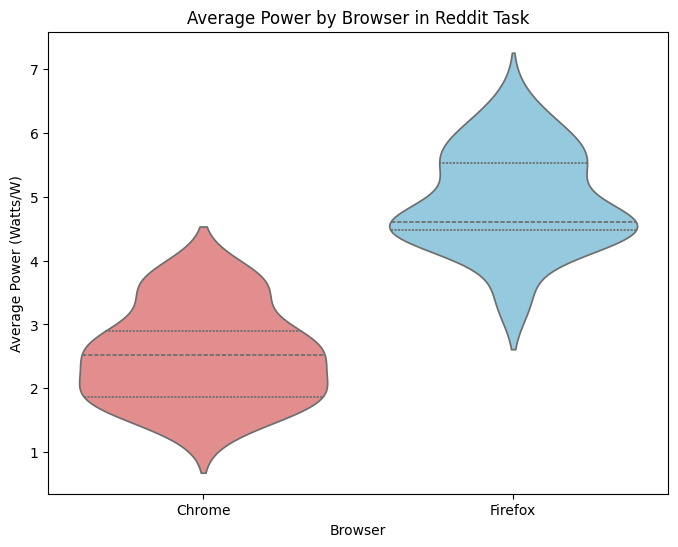

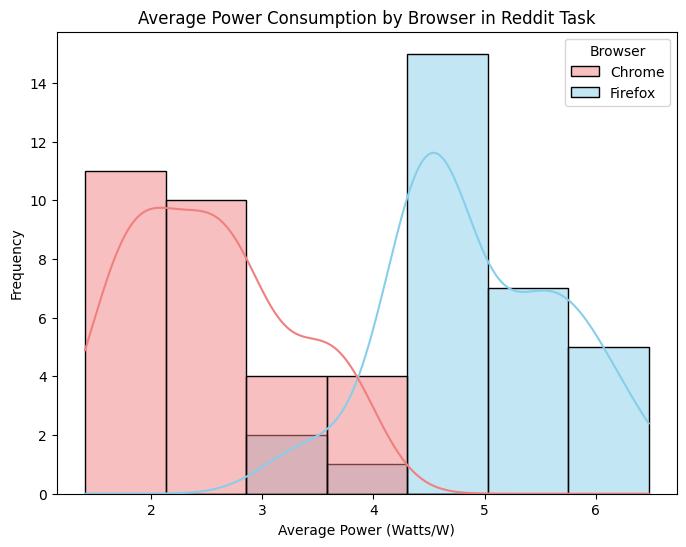

The p-value is: 7.203722282124134e-18
The t-statistic is: 12.43058420471576
The average baseline energy after outlier removal is: 240.6755143605709
Removed negative energy values:
Empty DataFrame
Columns: [Iteration, Browser, Energy (Joules)]
Index: []



/var/folders/79/ztkrtr2d7vsc99wl98npmf_80000gn/T/ipykernel_32663/363352208.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Browser', y='Energy (Joules)', data=df, inner="quartile",


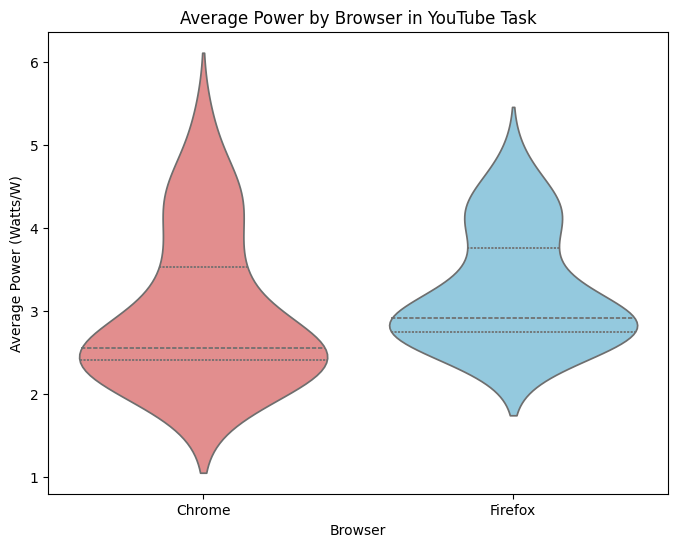

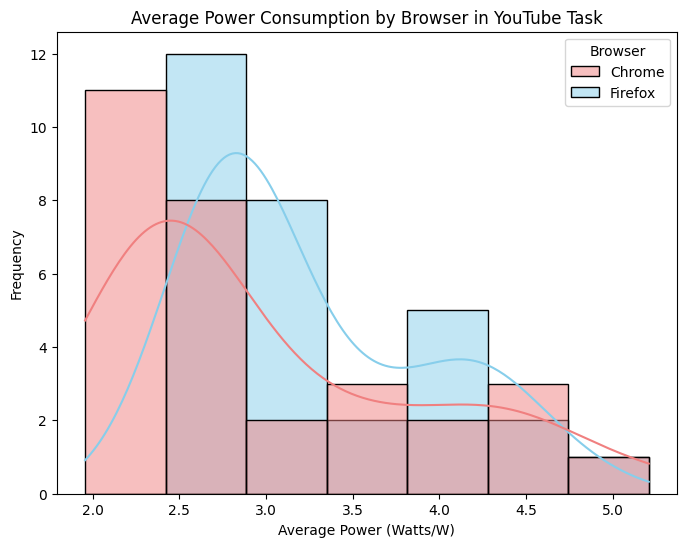

The p-value is: 0.21104113477441472
The t-statistic is: 1.264688742825957


In [16]:
process_e_data('benchmark_results_reddit.csv', 'Reddit Task')
process_e_data('benchmark_results_youtube.csv', 'YouTube Task')